<a href="https://colab.research.google.com/github/ckteja/CarDetection/blob/main/CarDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Clonning Yolo Architecture and installing requirements

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install
import torch
import utils
display = utils.notebook_init()  # checks

INFO:yolov5:YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.9/78.2 GB disk)


Mouting Drive for dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Unzipping Data

In [ ]:
!unzip /content/gdrive/MyDrive/Datasets/car.zip

Archive:  /content/gdrive/MyDrive/Datasets/car.zip
   creating: car detection/images/
   creating: car detection/images/test/
  inflating: car detection/images/test/81.jpg  
  inflating: car detection/images/test/82.jpg  
  inflating: car detection/images/test/83.jpg  
  inflating: car detection/images/test/84.jpg  
  inflating: car detection/images/test/85.jpg  
  inflating: car detection/images/test/86.jpg  
  inflating: car detection/images/test/87.jpg  
  inflating: car detection/images/test/88.jpg  
  inflating: car detection/images/test/89.jpg  
  inflating: car detection/images/test/90.jpg  
   creating: car detection/images/train/
  inflating: car detection/images/train/1.jpg  
  inflating: car detection/images/train/10.jpg  
  inflating: car detection/images/train/11.jpg  
  inflating: car detection/images/train/12.jpg  
  inflating: car detection/images/train/13.jpg  
  inflating: car detection/images/train/14.jpg  
  inflating: car detection/images/train/15.jpg  
  inflating

Model Training

In [ ]:
!python train.py --img 415 --batch 15 --epochs 99 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=99, batch_size=15, imgsz=415, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

Inference

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 196 --conf 0.25 --source ../car1.jpg

detect: weights=['runs/train/exp2/weights/best.pt'], source=../car1.jpg, data=data/coco128.yaml, imgsz=[196, 196], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [196, 196] must be multiple of max stride 32, updating to [224, 224]
image 1/1 /content/car1.jpg: 128x224 8 Cars, 11.5ms
Speed: 0.2ms pre-process, 11.5ms inference, 1.4ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/detect/exp


OUTPUT FOR INFERENCE

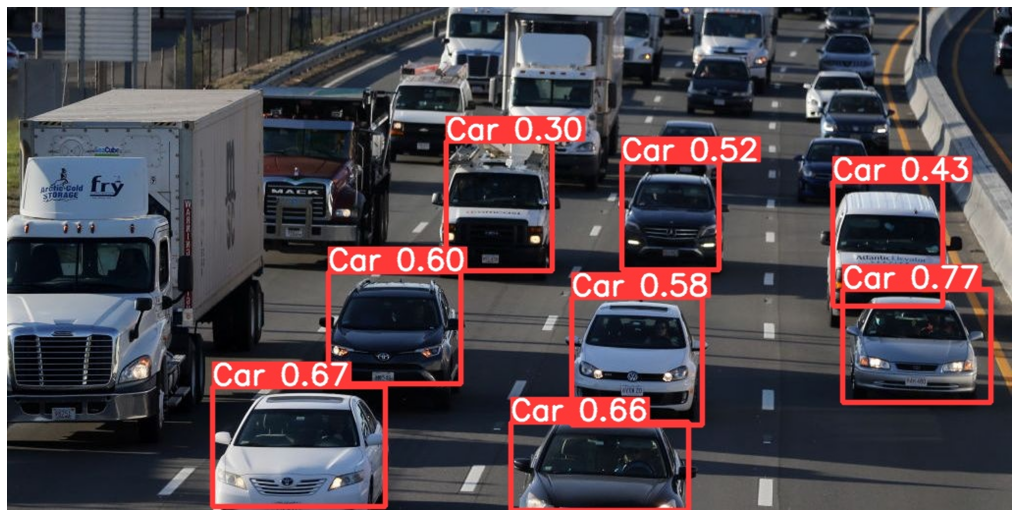

In [ ]:
image = cv2.imread("/content/yolov5/runs/detect/exp/car1.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

Video Inference

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 196 --conf 0.25 --source ../carvideo.mp4

detect: weights=['runs/train/exp2/weights/best.pt'], source=../carvideo.mp4, data=data/coco128.yaml, imgsz=[196, 196], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-216-g6e544d5 Python-3.7.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ --img-size [196, 196] must be multiple of max stride 32, updating to [224, 224]
video 1/1 (1/1501) /content/carvideo.mp4: 128x224 4 Cars, 10.6ms
video 1/1 (2/1501) /content/carvideo.mp4: 128x224 4 Cars, 12.6ms
video 1/1 (3/1501) /content/carvideo.mp4: 128x224 5 Cars, 13.8ms
video 1/1 (4/1501) /content/carvideo.mp4: 128x224 6 Cars, 32.7m

#Video  OUTPUT:
#[Click Here](https://drive.google.com/file/d/1FqT9WJl4uu6RERuSpDrTY2MqoCgNNyg4/view?usp=sharing)

RESULTS

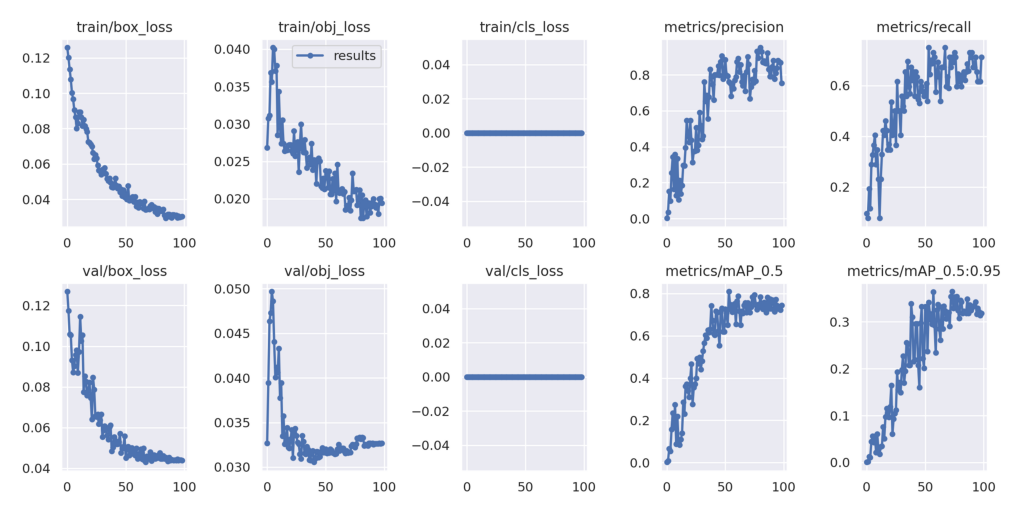

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("/content/yolov5/runs/train/exp2/results.png")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

VALIDATION

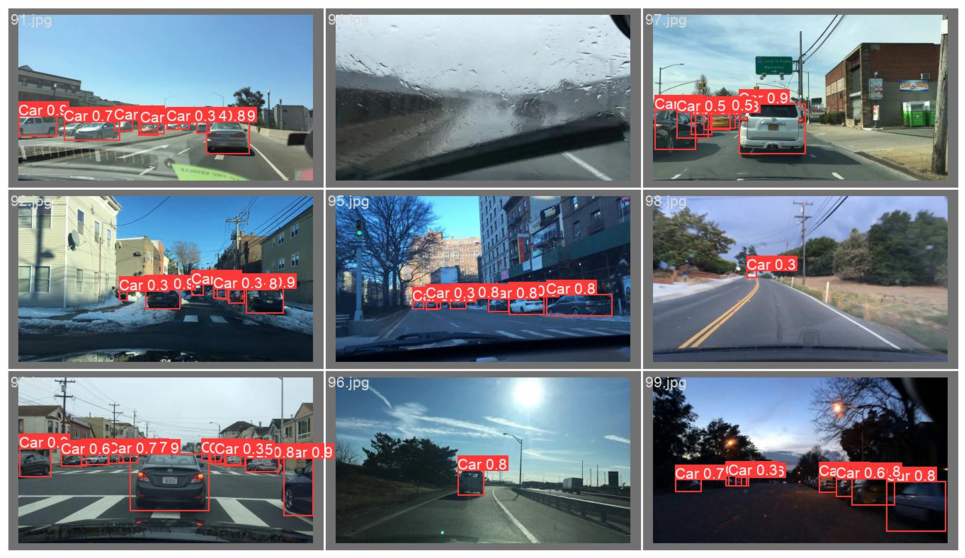

In [ ]:
image = cv2.imread("/content/yolov5/runs/train/exp2/val_batch0_pred.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()